In [996]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA

In [997]:
df = pd.read_csv('movieReplicationSet - Copy.csv')

In [998]:
def row_wiseremove(*args):
    temp = np.array([np.isnan(i) for i in args])
    temp2 = temp * 1
    temp2 = sum(temp2)
    missingData = np.where(temp2>0)
    
    combined = []
    for i in range(len(temp)):
        combined.append(np.delete(temp[i], missingData))
    
    return np.transpose(np.array(combined))

In [999]:
pd.set_option('display.max_columns',1000)
df

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),King Kong (1976),The Machinist (2004),A Nightmare on Elm Street (1984),Brazil (1985),The Fast and the Furious (2001),Change of Habit (1969),American Beauty (1999),Psycho (1960),Terminator 3: Rise of the Machines (2003),Night of the Living Dead (1968),Man on Fire (2004),Star Wars: Episode IV - A New Hope (1977),The Silence of the Lambs (1991),The Others (2001),Minority Report (2002),Sling Blade (1996),Schindler's List (1993),3000 Miles to Graceland (2001),Magnolia (1999),The Karate Kid Part II (1986),Planet of the Apes (2001),The Godfather: Part II (1974),Indiana Jones and the Temple of Doom (1984),Indiana Jones and the Raiders of the Lost Ark (1981),The Iron Giant (1999),The Matrix Revolutions (2003),North (1994),The Lost World: Jurassic Park (1997),The Texas Chainsaw Massacre (1974),Taxi Driver (1976),Back to the Future (1985),13 Going on 30 (2004),Sorority Boys (2002),The Bridges of Madison County (1995),Billy Madison (1995),Chain Reaction (1996),Batman & Robin (1997),Jurassic Park III (2001),Platoon (1986),Signs (2002),Terms of Endearment (1983),Mission: Impossible II (2000),Lost in Translation (2003),Star Trek: The Motion Picture (1979),Inglorious Bastards (2009),Clueless (1995),The Omen (1976),Shrek 2 (2004),Good Will Hunting (1997),Just Like Heaven (2005),Showgirls (1995),Diamonds are Forever (1971),Crossroads (2002),Pieces of April (2003),Torque (2004),Poltergeist (1982),Fear and Loathing in Las Vegas (1998),Barbarella (1968),The King of Marvin Gardens (1972),The Poseidon Adventure (1972),The Rock (1996),Love Story (1970),The Last Samurai (2003),The Jungle Book (1967),The Exorcist (1973),Pirates of the Caribbean: Dead Man's Chest (2006),Gone in Sixty Seconds (2000),Funny Girl (1968),Honey (2003),Blues Brothers 2000 (1998),Avatar (2009),The Pianist (2002),Godzilla (1998),Fight Club (1999),The Conjuring (2013),Top Gun (1986),Slackers (2002),Shrek (2001),12 Monkeys (1995),From Hell (2001),Dead Poets Society (1989),Once Upon a Time in America (1984),Equilibrium (2002),Star Wars: Episode II - Attack of the Clones (2002),The Thing (1982),Interstellar (2014),Full Metal Jacket (1987),Big Fish (2003),Cool Hand Luke (1967),A Beautiful Mind (2001),Sholay (1978),The 51st State (2001),Die Hard With a Vengeance (1995),Elf (2003),The Blue Lagoon (1980),Hellraiser (1987),Moonraker (1979),Leon (1994),Mystic River (2003),Sexy Beast (2000),Beetle Juice (1988),Andaz Apna Apna (1994),The Proposal (2009),The Shining (1980),The Land That Time Forgot (1974),The Perfect Storm (2000),Escape from LA (1996),Shutter Island (2010),JFK (1991),Barb Wire (1996),Oldboy (2003),Carrie (1976),The Good the Bad and the Ugly (1966),Speed 2: Cruise Control (1997),The Lord of the Rings: The Fellowship of the Ring (2001),The Talented Mr. Ripley (1999),Casino (1995),A Time to Kill (1996),Blazing Saddles (1974),The Doom Generation (1995),Armageddon (1998),X-Men (2000),Arachnophobia (1990),Stir Crazy (1980),Billy Jack (1971),The Silencers (1966),The Three Musketeers (1993),Girl Interrupted (1999),Finding Nemo (2003),Tropic of Cancer (1970),The Sixth Sense (1999),I Know What You Did Last Summer (1997),Indiana Jones and the Kingdom of the Crystal Skull (2008),Divine Secrets of the Ya-Ya Sisterhood (2002),Ace Ventura: When Nature Calls (1995),Dances with Wolves (1990),Date and Switch (2014),The Intouchables (2011),Mrs. Doubtfire (1993),Ghostbusters (2016),Almost Famous (2000),Blade Runner (1982),Unforgiven (1992),Rosemary's Baby (1968),Cheaper by the Dozen (2003),Can't Hardly Wait (1998),Die Another Day (2002),Toy Story 2 (1999),Transformers: Age of Extinction (2014),Like Stars on Earth (2007),Terminator 2: Judgement Day (1991),25th Hour (2002),Who's Afraid of Virginia Woolf (1966),Adaption (2002),Life is Beautiful (1997),Room (2015)

In [1000]:
combined = df.iloc[:, 400:474].dropna()
sensation = combined.iloc[:, 0:20]
personality =combined.iloc[:, 20:64]
experience = combined.iloc[:, 64:]

In [1005]:
zscoredData = stats.zscore(personality)
pca = PCA().fit(zscoredData)
eigVals = pca.explained_variance_
loadings = pca.components_
rotatedData = pca.fit_transform(zscoredData)*-1
covarExplained = eigVals/sum(eigVals)*100
for ii in range(len(covarExplained)):
    print(covarExplained[ii].round(3))

15.027
9.158
8.16
7.395
5.601
4.656
2.476
2.326
2.11
2.061
2.002
1.865
1.818
1.778
1.718
1.648
1.608
1.54
1.472
1.457
1.392
1.374
1.33
1.272
1.251
1.201
1.176
1.137
1.089
1.071
1.052
1.014
0.985
0.961
0.945
0.918
0.904
0.842
0.821
0.795
0.731
0.713
0.626
0.53


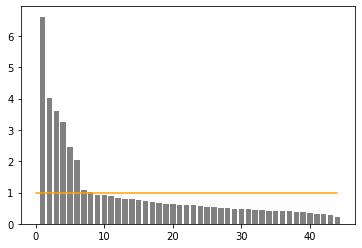

In [1006]:
numques = 44
x = np.linspace(1, numques, numques)
plt.bar(x, eigVals, color='gray')
plt.plot([0, numques],[1,1],color='orange')
plt.show()

In [1007]:
print(np.count_nonzero(eigVals > 1))

8


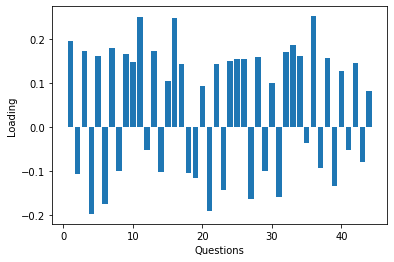

In [1008]:
whichPrincipleComponent = 0
plt.bar(x, loadings[whichPrincipleComponent, :]*-1)
plt.xlabel('Questions')
plt.ylabel('Loading')
plt.show()


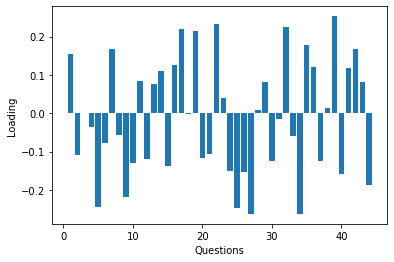

In [1009]:
whichPrincipleComponent = 4
plt.bar(x, loadings[whichPrincipleComponent, :]*-1)
plt.xlabel('Questions')
plt.ylabel('Loading')
plt.show()

In [1010]:
personality.columns.values

array(['Is talkative', 'Tends to find fault with others',
       'Does a thorough job', 'Is depressed/Blue',
       'Is original/comes up with new ideas', 'Is reserved',
       'Is helpful and unselfish with others', 'Can be somewhat careless',
       'Is relaxed/handles stress well',
       'Is curious about many different things', 'Is full of energy',
       'Starts quarrels with others', 'Is a reliable worker',
       'Can be tense', 'Is ingenious/a deep thinker',
       'Generates a lot of Enthusiasm', 'Has a forgiving nature',
       'Tends to be disorganized', 'Worries a lot',
       'Has an active imagination', 'Tends to be quiet',
       'Is generally trusting', 'Tends to be lazy',
       'Is emotionally stable/not easily upset', 'is inventive',
       'Has an assertive personality', 'Can be cold and aloof',
       'Perseveres until the task is finished', 'Can be moody',
       'Values artistic/aesthetic experiences',
       'Is sometimes shy/inhibited',
       'Is considerate 

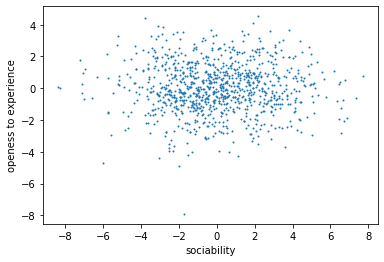

In [1011]:
# 6. Visualize our data in the new coordinate system:
plt.plot(rotatedData[:,0],rotatedData[:,4],'o',markersize=1)
plt.xlabel('sociability')
plt.ylabel('openess to experience')
plt.show()

In [1012]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
x = np.column_stack((rotatedData[:,2],rotatedData[:,4]))
print(len(rotatedData[:,2]))

953


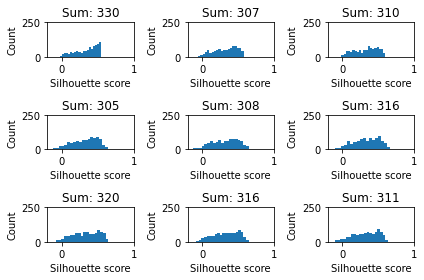

In [1013]:
# Silhouette: How similar to points in cluster vs. others, arbitrariness

# Remember: each data point gets its own silhouette coefficient ranging 
# from 0 (arbitrary classification) to 1 (ideal classification).

# Init:
numClusters = 9 # how many clusters are we looping over? (from 2 to 10)
Q = np.empty([numClusters,1])*np.NaN # init container to store sums

# Compute kMeans:
for ii in range(2, 11): # Loop through each cluster (from 2 to 10!)
    kMeans = KMeans(n_clusters = int(ii)).fit(x) # compute kmeans using scikit
    cId = kMeans.labels_ # vector of cluster IDs that the row belongs to
    cCoords = kMeans.cluster_centers_ # coordinate location for center of each cluster
    s = silhouette_samples(x,cId) # compute the mean silhouette coefficient of all samples
    Q[ii-2] = sum(s) # take the sum
    # Plot data:
    plt.subplot(3,3,ii-1) 
    plt.hist(s,bins=20) 
    plt.xlim(-0.2,1)
    plt.ylim(0,250)
    plt.xlabel('Silhouette score')
    plt.ylabel('Count')
    plt.title('Sum: {}'.format(int(Q[ii-2]))) # sum rounded to nearest integer
    plt.tight_layout() # adjusts subplot padding

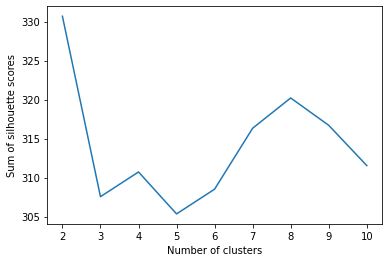

In [1014]:
# Plot this to make it clearer what is going on
plt.plot(np.linspace(2,10,9),Q)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of silhouette scores')
plt.show()

# kMeans gives you the center coordinates of the clusters, assuming a number
# of clusters. Silhouette gives you how many are most unamigously described
# by the clusters. Most likely "real" number: Where the sum of the
# silhouette scores peaks. In reality, they are complementary. Use together

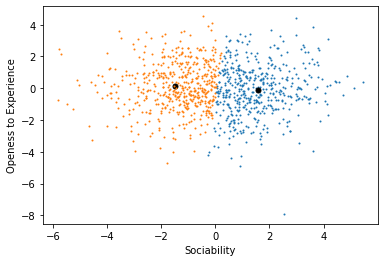

In [1015]:
# Now let's recompute the kMeans using 4 clusters and plot the color-coded data

# Recompute kMeans:
numClusters = 2
kMeans = KMeans(n_clusters = numClusters).fit(x) 
cId = kMeans.labels_ 
cCoords = kMeans.cluster_centers_ 

# Plot the color-coded data:
for ii in range(numClusters):
    plotIndex = np.argwhere(cId == int(ii))
    plt.plot(x[plotIndex,0],x[plotIndex,1],'o',markersize=1)
    plt.plot(cCoords[int(ii-1),0],cCoords[int(ii-1),1],'o',markersize=5,color='black')  
    plt.xlabel('Sociability')
    plt.ylabel('Openess to Experience')
    
# As you can see, kMeans returns as many clusters as you ask for. 
# What it does is returns the optimal center that minimizes the summed
# distance from all centers. But it requires - as an input (!) - how many
# clusters to look for. Basically, you find what you look for in terms of
# cluster number. And the sum of the summed distances is only going down

# Solution: "Silhouette"
# Silhouette takes distances nearest neighbor clusters into account

In [1016]:
reducedPersonality = rotatedData[:,1]*-1

In [1017]:
zscoredData = stats.zscore(sensation)
pca = PCA().fit(zscoredData)
eigVals = pca.explained_variance_
loadings = pca.components_
rotatedData = pca.fit_transform(zscoredData)
covarExplained = eigVals/sum(eigVals)*100
for ii in range(len(covarExplained)):
    print(covarExplained[ii].round(3))

17.431
9.037
8.21
6.596
5.736
5.202
4.896
4.858
4.464
4.301
3.95
3.736
3.689
3.357
3.047
2.864
2.776
2.516
1.753
1.58


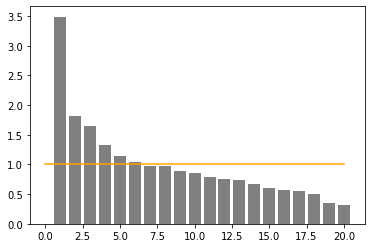

In [1018]:
numques = 20
x = np.linspace(1, numques, numques)
plt.bar(x, eigVals, color='gray')
plt.plot([0, numques],[1,1],color='orange')
plt.show()

In [1019]:
print(np.count_nonzero(eigVals > 1))

6


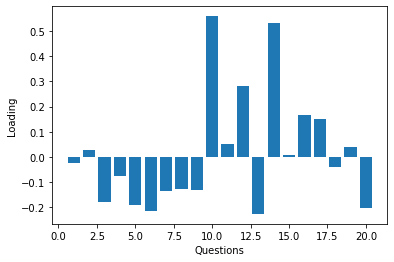

In [1020]:
whichPrincipleComponent = 2
plt.bar(x, loadings[whichPrincipleComponent, :]*-1)
plt.xticks = sensation.columns.values
plt.xlabel('Questions')
plt.ylabel('Loading')
plt.show()

In [1021]:
sensation.columns.values

array(['I enjoy driving fast', 'I enjoy rollercoasters ',
       'Have you ever bungee-jumped?', 'I enjoy impulse shopping',
       'I sometimes go out on weeknights even if I have work to do',
       'I enjoy doing things without too much planning ',
       'Have you ever been rock climbing?',
       'I enjoy being in large loud crowds like the Times Square Ball Drop on New Years Eve',
       'I enjoy going to large music or dance festivals ',
       'I enjoy watching horror movies', 'No risk - No fun',
       'I like to be surprised even if it startles or scares me',
       'Have you ever parachuted?', 'I enjoy haunted houses',
       'I had a sheltered upbringing', 'My life is very stressful',
       'I value my life to be well ordered and predictable',
       'Have you ridden a motorcycle?',
       'Have you gambled or bet for money?',
       'Have you ever been sky-diving?'], dtype=object)

In [1022]:
reducedSensation = rotatedData[:,2]*-1

In [1024]:
zscoredData = stats.zscore(experience)
pca = PCA().fit(zscoredData)
eigVals = pca.explained_variance_
loadings = pca.components_
roatatedData = pca.fit_transform(zscoredData)
covarExplained = eigVals/sum(eigVals)*100
for ii in range(len(covarExplained)):
    print(covarExplained[ii].round(3))

28.953
19.036
8.73
8.563
7.638
7.113
5.823
5.669
4.385
4.09


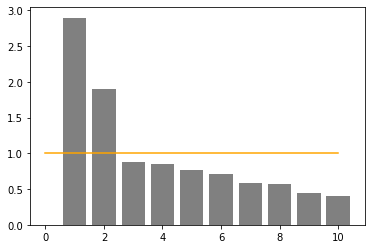

In [1025]:
numques = 10
x = np.linspace(1, numques, numques)
plt.bar(x, eigVals, color='gray')
plt.plot([0, numques],[1,1],color='orange')
plt.show()

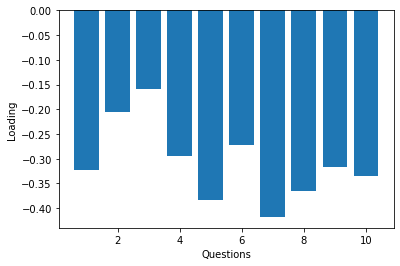

In [1026]:
whichPrincipleComponent = 0
plt.bar(x, loadings[whichPrincipleComponent, :]*-1)
plt.xlabel('Questions')
plt.ylabel('Loading')
plt.show()

In [1027]:
experience.columns

Index(['I have cried during a movie',
       'I have trouble following the story of a movie',
       'I have trouble remembering the story of a movie a couple of days after seeing it',
       'When watching a movie I cheer or shout or talk or curse at the screen',
       'When watching a movie I feel like the things on the screen are happening to me',
       'As a movie unfolds I start to have problems keeping track of events that happened earlier',
       'The emotions on the screen "rub off" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared',
       'When watching a movie I get completely immersed in the alternative reality of the film',
       'Movies change my position on social economic or political issues',
       'When watching movies things get so intense that I have to stop watching'],
      dtype='object')

In [1028]:
reducedMovie = roatatedData[:,1]*-1

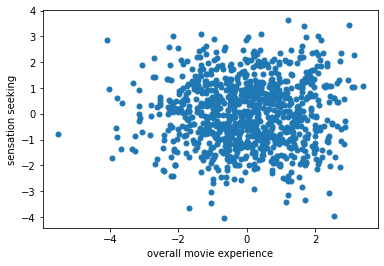

correlation:  0.02711174272168862


In [1029]:
plt.plot(reducedMovie,reducedSensation,'o',markersize=5)
plt.xlabel('overall movie experience')
plt.ylabel('sensation seeking')
plt.show()
print('correlation: ', np.corrcoef(reducedSensation, reducedMovie)[0,1])

In [1032]:
from sklearn.linear_model import LinearRegression

x = reducedMovie.reshape(len(reducedMovie),1)
y = reducedPersonality
model = LinearRegression().fit(x, y)
# Compute residuals:
slope = model.coef_ # Same goes for B1 (slope)
intercept = model.intercept_ # And B0 (intercept)
yHat = slope * x + intercept
residuals1 = y - yHat.flatten()
# Initialize data for second SLR:
# Create and fit model:
x = reducedSensation.reshape(len(reducedSensation),1)
y = reducedPersonality
model = LinearRegression().fit(x,y)

# Compute residuals:
slope = model.coef_ # Same goes for B1 (slope)
intercept = model.intercept_ # And B0 (intercept)
yHat = slope * x + intercept
residuals2 = y - yHat.flatten()

# Correlate the residuals:
partCorr = np.corrcoef(residuals1,residuals2)
print('Partial correlation:',partCorr[0,1],3)

Partial correlation: 0.9846915454117291 3


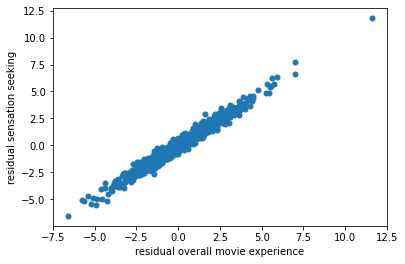

Partial correlation: 0.9846915454117291


In [1034]:
plt.plot(residuals1,residuals2,'o',markersize=5)
plt.xlabel('residual overall movie experience')
plt.ylabel('residual sensation seeking')
plt.show()
print('Partial correlation:',partCorr[0,1])

In [90]:
df = df.iloc[:,:400]
popularity_per_movie = {}
for i in df.columns:
    c = 0
    for j in df[i]:
        if np.isnan(j) != True:
            c+=1
    popularity_per_movie[i] = c

In [91]:
pop_list = np.array([i[1] for i in popularity_per_movie.items()])
np.median(pop_list)

197.5

In [92]:
# more popular > 266, less popular <= 266

In [93]:
movie_greater = np.array([i[0] for i in popularity_per_movie.items() if i[1] > 197.5])
movie_smaller = np.array([i[0] for i in popularity_per_movie.items() if i[1] <= 197.5])

In [94]:
df_g = df[movie_greater]
df_s = df[movie_smaller]

In [95]:
g_rate = df_g.mean(axis=1).values
s_rate = df_s.mean(axis=1).values

In [96]:
temp = np.array([np.isnan(g_rate),np.isnan(s_rate)],dtype = bool)
temp2 = temp * 1
temp2 = sum(temp2)
missingData = np.where(temp2>0)
g_clean = np.delete(g_rate, missingData)
s_clean = np.delete(s_rate, missingData)

In [97]:
combined = np.transpose(np.array([g_clean,s_clean]))

In [98]:
t, p = stats.ttest_ind(combined[:,0], combined[:,1])
p # more popular is higher, p < 0.05

3.798399239327428e-18

Text(0.5, 1.0, 'Confidence Interval for Mean Difference (more - less)')

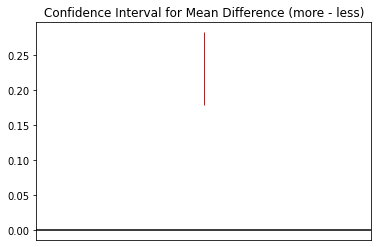

In [99]:
import numpy as np, statsmodels.stats.api as sms
X1, X2 = combined[:,0], combined[:,1]
cm = sms.CompareMeans(sms.DescrStatsW(X1), sms.DescrStatsW(X2))
lower, higher = cm.tconfint_diff(usevar='unequal')
plt.axhline(y=0, color='black', label='avline')
plt.vlines(x = 0.5, ymin=lower, ymax=higher, linewidth=1, color='r')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.title('Confidence Interval for Mean Difference (more - less)')

In [100]:
bootCI(X1, 'More Popular Bootstraping CI')

NameError: name 'bootCI' is not defined

In [ ]:
bootCI(X2, 'Less Popular Bootstraping CI')

In [101]:
u,p = stats.mannwhitneyu(combined[:,0], combined[:,1])
p

1.9517219238908242e-14

In [102]:
# no over laps, significant with p < 0.05, #3 is significantly higher

In [103]:
df = pd.read_csv('movieReplicationSet - Copy.csv')
femalerows = df.index[df['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 1]
malerows = df.index[df['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 2]

In [104]:
femalerate = df['Shrek (2001)'][femalerows].dropna().values
malerate = df['Shrek (2001)'][malerows].dropna().values

In [105]:
display(stats.levene(femalerate, malerate)) # they are homogenously variant

LeveneResult(statistic=0.44722614898750407, pvalue=0.503812335250825)

In [106]:
t, p = stats.ttest_ind(femalerate, malerate)
p # no, p > 0.05


0.27087511813734183

-0.05074445208574738 0.19567109801483348


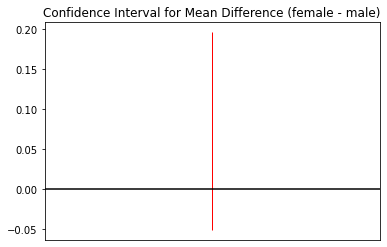

In [107]:
import numpy as np, statsmodels.stats.api as sms
X1, X2 = femalerate, malerate
cm = sms.CompareMeans(sms.DescrStatsW(X1), sms.DescrStatsW(X2))
lower, higher = cm.tconfint_diff(usevar='unequal')
plt.axhline(y=0, color='black', label='avline')
plt.vlines(x = 0.5, ymin=lower, ymax=higher, linewidth=1, color='r')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.title('Confidence Interval for Mean Difference (female - male)')
print(lower, higher)

p-value:  0.13127


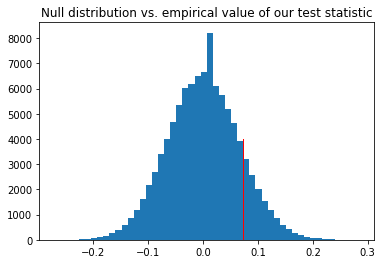

In [109]:
# permutation test
empiricalData1 = femalerate
empiricalData2 = malerate
ourTestStat = np.mean(empiricalData1) - np.mean(empiricalData2)
numReps = int(1e5) # This is how many times we'll draw WITHOUT replacement 
# to create the null distribution
jointData = np.concatenate((empiricalData1,empiricalData2)) # Stack them on 
# top of each other. For a joint representation.
n1 = len(empiricalData1) # How long one of them is
n2 = len(jointData) # Overall length
shuffledStats = np.empty([numReps,1]) # Initialize empty array
shuffledStats[:] = np.NaN # Then convert to NaN

# Joint Data has indices from 1 to 2xn1. 
# Step 1: Randomly shuffle those indices
# Step 2: Split them in the middle to create two artificial groups 
# Step 3: Repeat num reps times
# Step 4: Profit
for i in range(numReps):
    shuffledIndices = np.random.permutation(n2) # shuffle indices 0 to 2985
    shuffledGroup1 = jointData[shuffledIndices[:n1]]
    shuffledGroup2 = jointData[shuffledIndices[n1:]]
    shuffledStats[i,0] = np.mean(shuffledGroup1) - np.mean(shuffledGroup2)
plt.hist(shuffledStats,50)
plt.title('Null distribution vs. empirical value of our test statistic')
plt.plot([ourTestStat,ourTestStat],[0,4000],color='red',linewidth=1.0)

temp1 = np.argwhere(shuffledStats > ourTestStat)

# How often is the test stat larger than the empirical one by chance?:
temp2 = len(temp1)

# Compute the p-value:
exactPvalue = temp2/len(shuffledStats)
print('p-value: ', exactPvalue)

In [110]:
len(malerate)

241

In [111]:
u,p = stats.mannwhitneyu(malerate, femalerate)
p

0.050536625925559006

In [112]:
# overlap, not statistically significant, #4 is not significant

In [113]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [114]:
def bootCI(x, title = None):
    combinedData = x
    numRepeats = int(1e4) # How many times do we want to resample the 1 empirical 
    # sample we have?
    nSample = len(combinedData) # Number of data points in the sample

    # Preallocate what will contain the bootstrapped sample means:
    tychenicMeans = np.empty([numRepeats,1]) 
    tychenicMeans[:] = np.NaN

    # Draw integers - which we'll use as indices, num_repeats times:
    tychenicIndices = np.random.randint(0,nSample,[numRepeats,numRepeats])
    # Draw random nuumbers from 0 to n_sample (not inclusive), to yield an array
    # with dimensions that are num_repeats x num_repeats (10000 x 10000)

    # Estimate the stability of the sample mean for which movie?:
    whichMovie = 0 # 0 = M1, 1 = M2, 2 = M3 (try all 3)
    temp = combinedData # store that data in temp array
    for i in range(numRepeats): # loop through each repeat
        tempIndices = tychenicIndices[:,i] # indices for this iteration
        tychenicMeans[i] = np.mean(temp[tempIndices]) # compute the mean

    # How good is our estimate of the empirical sample mean as the mean of the
    # resampled tychenic means? 
    estimateOffset = np.mean(tychenicMeans) - np.mean(combinedData)

    confidenceLevel = 95 # What confidence level (probability of containing 
    # the empirical mean) is desired? Also try 99%
    lowerBoundPercent = (100 - confidenceLevel)/2 # lower bound
    upperBoundPercent = 100 - lowerBoundPercent # upper bound
    lowerBoundIndex = round(numRepeats/100*lowerBoundPercent)-1 # what index?
    upperBoundIndex = round(numRepeats/100*upperBoundPercent)-1 # what index?
    sortedSamples = np.sort(tychenicMeans,axis=0)
    lowerBound = sortedSamples[lowerBoundIndex] # What tychenic value consistutes the lower bound?
    upperBound = sortedSamples[upperBoundIndex] # What tychenic value consistutes the upper bound?

    # Add it to the plot:
    numBins = 101
    plt.hist(tychenicMeans,numBins)
    plt.title(title)
    plt.xlabel('sample means')
    plt.ylabel('c')
    plt.plot([np.mean(combinedData),np.mean(combinedData)],[0,400],color='black',linewidth=0.5)
    plt.plot([lowerBound,lowerBound],[0,400],color='red',linewidth=0.5) 
    plt.plot([upperBound,upperBound],[0,400],color='red',linewidth=0.5) 
    print(lowerBound, upperBound)

In [115]:
onlychild = df.index[df['Are you an only child? (1: Yes; 0: No; -1: Did not respond)'] == 1]
other = df.index[df['Are you an only child? (1: Yes; 0: No; -1: Did not respond)'] == 0]
onlyc_lion = df['The Lion King (1994)'].loc[onlychild].dropna().values
sib_lion = df['The Lion King (1994)'].loc[other].dropna().values

In [116]:
display(stats.levene(sib_lion, onlyc_lion)) # they are homogenously variant

LeveneResult(statistic=1.3208969311840386, pvalue=0.25072822333565686)

In [117]:
t, p = stats.ttest_ind(sib_lion,onlyc_lion)

In [118]:
p # p < 0.05, significant

0.04026705526268264

-0.006272381589320392 0.2748256689519206


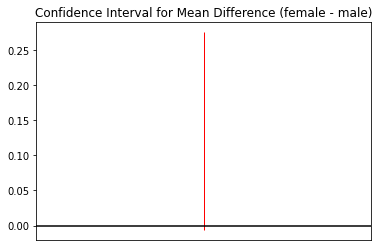

In [119]:
import numpy as np, statsmodels.stats.api as sms
X1, X2 = sib_lion,onlyc_lion
cm = sms.CompareMeans(sms.DescrStatsW(X1), sms.DescrStatsW(X2))
lower, higher = cm.tconfint_diff(usevar='unequal')
plt.axhline(y=0, color='black', label='avline')
plt.vlines(x = 0.5, ymin=lower, ymax=higher, linewidth=1, color='r')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.title('Confidence Interval for Mean Difference (female - male)')
print(lower, higher)

-0.006272381589320392 0.2748256689519206


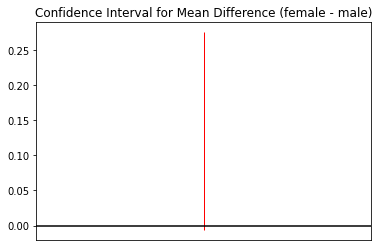

In [120]:
import numpy as np, statsmodels.stats.api as sms
X1, X2 = sib_lion, onlyc_lion
cm = sms.CompareMeans(sms.DescrStatsW(X1), sms.DescrStatsW(X2))
lower, higher = cm.tconfint_diff(usevar='unequal')
plt.axhline(y=0, color='black', label='avline')
plt.vlines(x = 0.5, ymin=lower, ymax=higher, linewidth=1, color='r')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.title('Confidence Interval for Mean Difference (female - male)')
print(lower, higher)

[3.33165] [3.3638]


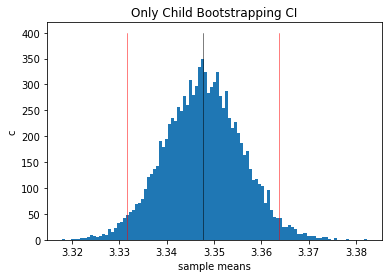

In [121]:
bootCI(onlyc_lion, 'Only Child Bootstrapping CI')

[3.468] [3.49585]


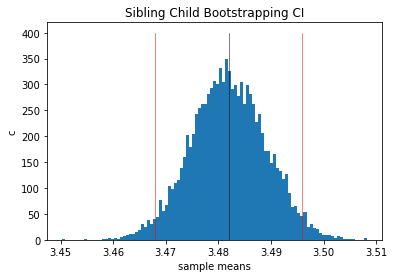

In [122]:
bootCI(sib_lion, 'Sibling Child Bootstrapping CI')

p-value:  0.02109


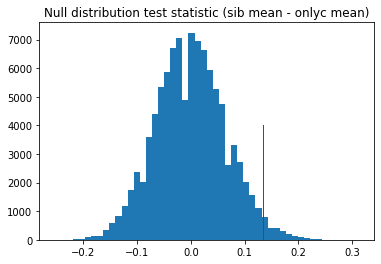

In [123]:
# permutation test
empiricalData1 = sib_lion
empiricalData2 = onlyc_lion
ourTestStat = np.mean(empiricalData1) - np.mean(empiricalData2)
numReps = int(100000) # This is how many times we'll draw WITHOUT replacement 
# to create the null distribution
jointData = np.concatenate((empiricalData1,empiricalData2)) # Stack them on 
# top of each other. For a joint representation.
n1 = len(empiricalData1) # How long one of them is
n2 = len(jointData) # Overall length
shuffledStats = np.empty([numReps,1]) # Initialize empty array
shuffledStats[:] = np.NaN # Then convert to NaN

# Joint Data has indices from 1 to 2xn1. 
# Step 1: Randomly shuffle those indices
# Step 2: Split them in the middle to create two artificial groups 
# Step 3: Repeat num reps times
# Step 4: Profit
for i in range(numReps):
    shuffledIndices = np.random.permutation(n2) # shuffle indices 0 to 2985
    shuffledGroup1 = jointData[shuffledIndices[:n1]]
    shuffledGroup2 = jointData[shuffledIndices[n1:]]
    shuffledStats[i,0] = np.mean(shuffledGroup1) - np.mean(shuffledGroup2)
plt.hist(shuffledStats,50)
plt.title('Null distribution test statistic (sib mean - onlyc mean)')
plt.plot([ourTestStat,ourTestStat],[0,4000],color='red',linewidth=1.0)

temp1 = np.argwhere(shuffledStats > ourTestStat)

# How often is the test stat larger than the empirical one by chance?:
temp2 = len(temp1)

# Compute the p-value:
exactPvalue = temp2/len(shuffledStats)
print('p-value: ', exactPvalue)

In [124]:
# statistically significant 

In [125]:
social = df.index[df['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'] == 1]
nonsocial = df.index[df['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'] == 0]
social_wall = df['The Wolf of Wall Street (2013)'][social].dropna().values
nonsocial_wall = df['The Wolf of Wall Street (2013)'][nonsocial].dropna().values

In [126]:
stats.levene(social_wall,nonsocial_wall) # they are equally variant

LeveneResult(statistic=0.80550320152209, pvalue=0.369779852094133)

In [127]:
t, p = stats.ttest_ind(social_wall, nonsocial_wall)

In [128]:
p # p > 0.05 

0.11738913665664574

In [129]:
u, p = stats.mannwhitneyu(social_wall, nonsocial_wall)
p

0.1127642933222891

-0.029393014967163483 0.25025815491627346


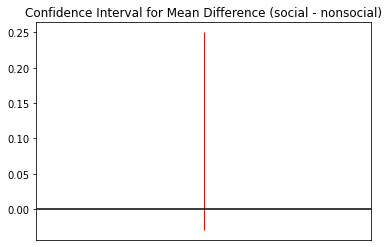

In [130]:
import numpy as np, statsmodels.stats.api as sms
X1, X2 = social_wall, nonsocial_wall
cm = sms.CompareMeans(sms.DescrStatsW(X1), sms.DescrStatsW(X2))
lower, higher = cm.tconfint_diff(usevar='unequal')
plt.axhline(y=0, color='black', label='avline')
plt.vlines(x = 0.5, ymin=lower, ymax=higher, linewidth=1, color='r')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.title('Confidence Interval for Mean Difference (social - nonsocial)')
print(lower, higher)

p-value:  0.0582


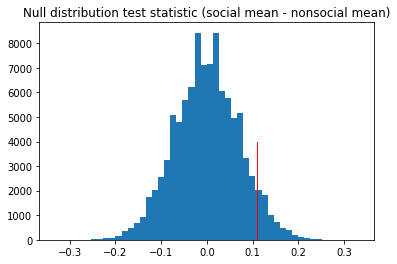

In [977]:
# permutation test
empiricalData1 = social_wall
empiricalData2 = nonsocial_wall
ourTestStat = np.mean(empiricalData1) - np.mean(empiricalData2)
numReps = int(100000) # This is how many times we'll draw WITHOUT replacement 
# to create the null distribution
jointData = np.concatenate((empiricalData1,empiricalData2)) # Stack them on 
# top of each other. For a joint representation.
n1 = len(empiricalData1) # How long one of them is
n2 = len(jointData) # Overall length
shuffledStats = np.empty([numReps,1]) # Initialize empty array
shuffledStats[:] = np.NaN # Then convert to NaN

# Joint Data has indices from 1 to 2xn1. 
# Step 1: Randomly shuffle those indices
# Step 2: Split them in the middle to create two artificial groups 
# Step 3: Repeat num reps times
# Step 4: Profit
for i in range(numReps):
    shuffledIndices = np.random.permutation(n2) # shuffle indices 0 to 2985
    shuffledGroup1 = jointData[shuffledIndices[:n1]]
    shuffledGroup2 = jointData[shuffledIndices[n1:]]
    shuffledStats[i,0] = np.mean(shuffledGroup1) - np.mean(shuffledGroup2)
plt.hist(shuffledStats,50)
plt.title('Null distribution test statistic (social mean - nonsocial mean)')
plt.plot([ourTestStat,ourTestStat],[0,4000],color='red',linewidth=1.0)

temp1 = np.argwhere(shuffledStats > ourTestStat)

# How often is the test stat larger than the empirical one by chance?:
temp2 = len(temp1)

# Compute the p-value:
exactPvalue = temp2/len(shuffledStats)
print('p-value: ', exactPvalue)

In [132]:
# Not significantly more, so the null hypothesis of not significantly higher holds

In [133]:
# 7: write a function to compare the movies in the franchise, show the confidence interval for all movies

In [134]:
movies = []
for i in df.columns:
    if 'Star Wars' in i:
        movies.append(i)
starwars = df[np.array(movies)].dropna()

In [135]:
import matplotlib.pyplot as plt
import statistics
from math import sqrt


def plot_confidence_interval(x, values, color='#2187bb', horizontal_line_width=0.25):
    lower, higher = stats.t.interval(alpha=0.95, df=len(values)-1, loc=np.mean(values), scale=stats.sem(values))
    mean = np.mean(values)
    left = x - horizontal_line_width / 5
    right = x + horizontal_line_width / 5
    plt.plot([x, x], [higher, lower], color=color)
    plt.plot([left, right], [higher, higher], color=color)
    plt.plot([left, right], [lower, lower], color=color)
    plt.plot(x, mean, 'o', color='red')

[3.2073] [3.243]
[2.55615] [2.59595]
[3.2126] [3.24925]
[2.4889] [2.53235]
[3.1439] [3.18]
[3.1242] [3.16145]


2.399595163532992e-38

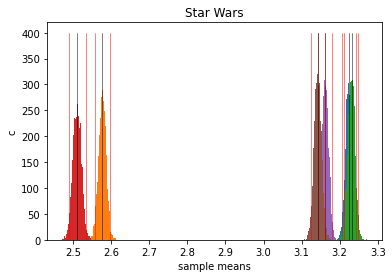

In [161]:
# arr = [i for i in range(1, len(starwars.columns.values) + 1)]
# plt.title('Star Wars Confidence Interval')

# tick = 1
# for i in range(len(starwars.columns.values)):
#     plot_confidence_interval(tick, starwars.iloc[:,i].values)
#     tick += 1
bootCI(starwars.iloc[:,0].values)
bootCI(starwars.iloc[:,1].values)
bootCI(starwars.iloc[:,2].values)
bootCI(starwars.iloc[:,3].values)
bootCI(starwars.iloc[:,4].values)
bootCI(starwars.iloc[:,5].values)
plt.title('Star Wars')
    
f,p = stats.f_oneway(starwars.iloc[:,0].values, starwars.iloc[:,1].values, starwars.iloc[:,2].values, starwars.iloc[:,3].values,starwars.iloc[:,4].values,starwars.iloc[:,5].values)
p

In [141]:
# starwars movie are inconsistent

0.2275340290918136
[3.4032] [3.43455]
[3.3575] [3.38895]
[3.3436] [3.3746]
[3.31435] [3.3473]


Text(0.5, 1.0, 'Harry Potter')

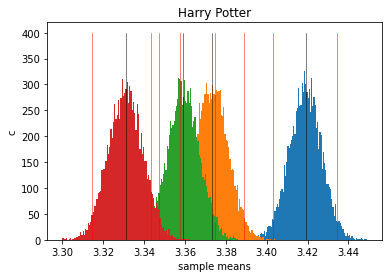

In [162]:
movies = []
for i in df.columns:
    if 'Harry Potter' in i:
        movies.append(i)
hp = df[np.array(movies)].dropna()

# plt.title('Harry Potter Confidence Interval')

# tick = 1
# for i in range(len(hp.columns.values)):
#     plot_confidence_interval(tick, hp.iloc[:,i].values)
#     tick += 1
    
f,p = stats.f_oneway(hp.iloc[:,0].values,hp.iloc[:,1].values,hp.iloc[:,2].values,hp.iloc[:,3].values)
print(p)

bootCI(hp.iloc[:,0].values)
bootCI(hp.iloc[:,1].values)
bootCI(hp.iloc[:,2].values)
bootCI(hp.iloc[:,3].values)
plt.title('Harry Potter')

In [164]:
# Harry Potter are consistent

1.2957225925356723e-08
[2.7855] [2.8251]
[2.828] [2.8647]
[3.23755] [3.2702]


Text(0.5, 1.0, 'The Matrix')

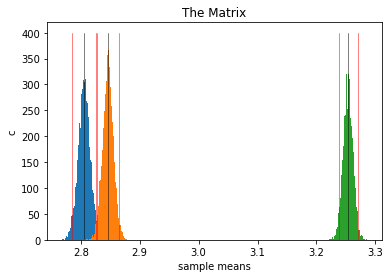

In [166]:
movies = []
for i in df.columns:
    if 'The Matrix' in i:
        movies.append(i)
val = df[np.array(movies)].dropna()


# tick = 1
# for i in range(len(val.columns.values)):
#     plot_confidence_interval(tick, val.iloc[:,i].values)
#     tick += 1

f,p = stats.f_oneway(val.iloc[:,0].values,val.iloc[:,1].values,val.iloc[:,2].values)
print(p)
bootCI(val.iloc[:,0].values)
bootCI(val.iloc[:,1].values)
bootCI(val.iloc[:,2].values)
plt.title('The Matrix')

In [452]:
# The matrix are inconsistent

5.20425425762115e-12
[2.9072] [2.9412]
[2.81265] [2.8471]
[3.038] [3.07335]
[2.4323] [2.47305]


Text(0.5, 1.0, 'Indiana Jones')

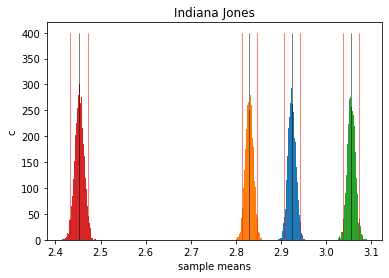

In [168]:
movies = []
for i in df.columns:
    if 'Indiana Jones' in i:
        movies.append(i)
val = df[np.array(movies)].dropna()

plt.title('Indiana Jones')

# tick = 1
# for i in range(len(val.columns.values)):
#     plot_confidence_interval(tick, val.iloc[:,i].values)
#     tick += 1

f,p = stats.f_oneway(val.iloc[:,0].values,val.iloc[:,1].values,val.iloc[:,2].values,val.iloc[:,3].values)
print(p)
bootCI(val.iloc[:,0].values)
bootCI(val.iloc[:,1].values)
bootCI(val.iloc[:,2].values)
bootCI(val.iloc[:,3].values)
plt.title('Indiana Jones')

In [454]:
# Indana Jones are inconsisxtent

3.542127514286409e-10
[2.9406] [2.97395]
[2.6937] [2.73115]
[3.11565] [3.15055]


,The Lost World: Jurassic Park (1997),Jurassic Park III (2001),Jurassic Park (1993)
5,3.5,1.5,3.5
7,4.0,3.5,4.0
13,3.5,3.5,4.0
15,4.0,4.0,4.0
16,2.0,2.0,2.0
...,...,...,...
1085,1.0,1.5,1.0
1086,4.0,3.5,4.0
1090,3.0,3.5,4.0
1091,3.0,3.0,3.0


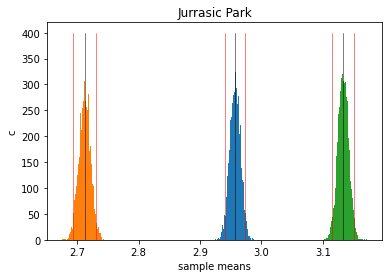

In [176]:
movies = []
for i in df.columns:
    if 'Jurassic Park' in i:
        movies.append(i)
val = df[np.array(movies)].dropna()

# plt.title('Jurassic Park Confidence Interval')

# tick = 1
# for i in range(len(val.columns.values)):
#     plot_confidence_interval(tick, val.iloc[:,i].values)
#     tick += 1

f,p = stats.f_oneway(val.iloc[:,0].values,val.iloc[:,1].values,val.iloc[:,2].values)
print(p)
bootCI(val.iloc[:,0].values)
bootCI(val.iloc[:,1].values)
bootCI(val.iloc[:,2].values)
plt.title('Jurrasic Park')
val

0.03207932803269902
[2.96765] [3.0018]
[2.8762] [2.9136]
[3.0179] [3.05335]


,Pirates of the Caribbean: Dead Man's Chest (2006),Pirates of the Caribbean: At World's End (2007),Pirates of the Caribbean: The Curse of the Black Pearl (2003)
3,2.0,1.0,3.0
4,2.0,3.0,3.0
5,4.0,4.0,4.0
6,1.5,0.5,0.0
7,2.5,2.0,3.0
...,...,...,...
1087,4.0,4.0,4.0
1088,1.5,0.5,1.5
1090,3.5,3.5,4.0
1093,3.5,3.5,3.5


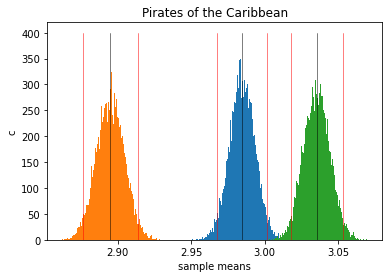

In [177]:
movies = []
for i in df.columns:
    if 'Pirates of the Caribbean' in i:
        movies.append(i)
val = df[np.array(movies)].dropna()

# plt.title('Pirates of the Caribbean Confidence Interval')

# tick = 1
# # for i in range(len(val.columns.values)):
# #     plot_confidence_interval(tick, val.iloc[:,i].values)
# #     tick += 1
f,p = stats.f_oneway(val.iloc[:,0].values,val.iloc[:,1].values,val.iloc[:,2].values)
print(p)

bootCI(val.iloc[:,0].values)
bootCI(val.iloc[:,1].values)
bootCI(val.iloc[:,2].values)
plt.title('Pirates of the Caribbean')
val

0.0005193828629536134
[3.1805] [3.2135]
[3.29125] [3.32295]
[3.3422] [3.3746]


,Toy Story 2 (1999),Toy Story 3 (2010),Toy Story (1995)
0,3.0,3.0,4.0
1,1.0,4.0,3.0
3,3.0,3.0,3.0
5,1.5,1.0,3.0
11,3.5,3.5,4.0
...,...,...,...
1092,3.5,4.0,4.0
1093,3.5,4.0,3.5
1094,3.0,3.5,3.0
1095,2.5,3.5,3.0


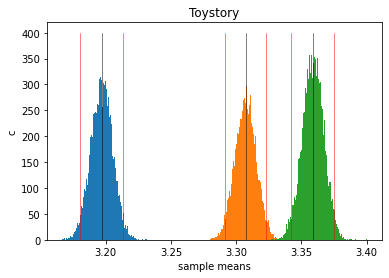

In [178]:
movies = []
for i in df.columns:
    if 'Toy Story' in i:
        movies.append(i)
val = df[np.array(movies)].dropna()

f,p = stats.f_oneway(val.iloc[:,0].values,val.iloc[:,1].values,val.iloc[:,2].values)
print(p)

bootCI(val.iloc[:,0].values)
bootCI(val.iloc[:,1].values)
bootCI(val.iloc[:,2].values)
plt.title('Toystory')
val

1.6410731510652519e-18
[2.30205] [2.3458]
[2.81895] [2.8565]
[3.2098] [3.24705]


,Batman & Robin (1997),Batman (1989),Batman: The Dark Knight (2008)
4,0.5,1.0,2.5
5,2.5,2.5,3.5
7,2.0,2.5,3.5
18,4.0,4.0,4.0
22,3.5,3.5,4.0
...,...,...,...
1065,0.0,3.5,3.5
1075,4.0,4.0,4.0
1081,3.0,3.0,4.0
1086,2.0,2.5,4.0


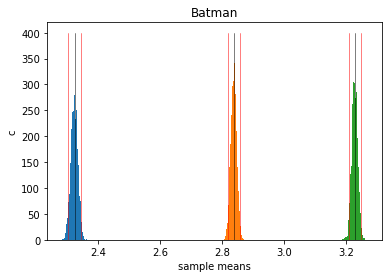

In [179]:
movies = []
for i in df.columns:
    if 'Batman' in i:
        movies.append(i)
val = df[np.array(movies)].dropna()

# plt.xticks([i for i in range(1, len(val.columns.values) + 1)])
# plt.title('Batman Confidence Interval')

# tick = 1
# for i in range(len(val.columns.values)):
#     plot_confidence_interval(tick, val.iloc[:,i].values)
#     tick += 1
    
f,p = stats.f_oneway(val.iloc[:,0].values,val.iloc[:,1].values,val.iloc[:,2].values)
print(p)
bootCI(val.iloc[:,0].values)
bootCI(val.iloc[:,1].values)
bootCI(val.iloc[:,2].values)
plt.title('Batman')
val

In [206]:
rotatedData.shape

(1000, 44)

In [786]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

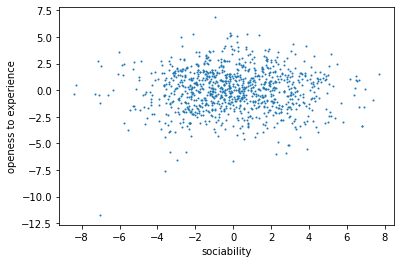

In [604]:
# 6. Visualize our data in the new coordinate system:
plt.plot(rotatedData[:,0],rotatedData[:,1],'o',markersize=1)
plt.xlabel('sociability')
plt.ylabel('openess to experience')
plt.show()

In [791]:
y = df.iloc[:,0:400].loc[df.iloc[:,420:464].dropna().index.values].apply(lambda x: np.nanmean(x), axis = 1)
m = np.median(y)
yor = y.apply(lambda x: 1 if x > m else 0).to_numpy()
y = y.apply(lambda x: 1 if x > m else 0).to_numpy()[0:600]
X = np.column_stack((rotatedData[:,0][0:600],rotatedData[:,3][0:600]))

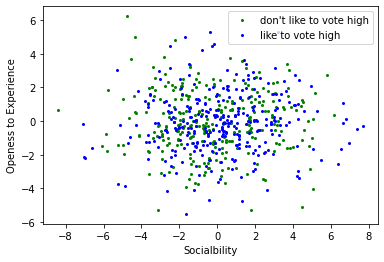

In [792]:
# Another view on this, but the outcome is represented by color, not a 3rd
# dimension. To make it clear that you have to draw a line in predictor
# space, not outcome space
plt.plot(X[np.argwhere(y==0),0],X[np.argwhere(y==0),1],'o',markersize=2,color='green')
plt.plot(X[np.argwhere(y==1),0],X[np.argwhere(y==1),1],'o',markersize=2,color='blue')
plt.xlabel('Socialbility')
plt.ylabel('Openess to Experience')
plt.legend(['don\'t like to vote high','like to vote high'])
plt.show()

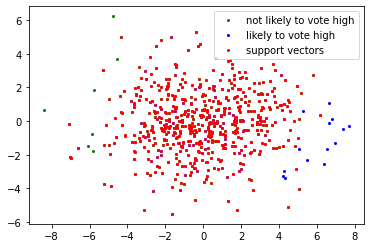

In [793]:
clf = svm.SVC(kernel='linear').fit(X,y)
# Step 2: Visualize the support vectors (you can skip this once you know
# what you're doing). For now, let's add that to the scatter plot.
sV = clf.support_vectors_ # Retrieve the support vectors from the model
plt.plot(X[np.argwhere(y==0),0],X[np.argwhere(y==0),1],'o',markersize=2,color='green')
plt.plot(X[np.argwhere(y==1),0],X[np.argwhere(y==1),1],'o',markersize=2,color='blue')
plt.plot(sV[:,0],sV[:,1],'o',markersize=2,color='red')
plt.legend(['not likely to vote high','likely to vote high','support vectors'])
plt.show()

In [797]:
import math
predictions = clf.predict(np.column_stack((rotatedData[:,0][600:],rotatedData[:,3][600:]))) # Decision reflects who the model thinks will be depressed

# Step 4: Assess model accuracy by comparing predictions with reality
modelAccuracy = roc_auc_score(yor[600:],predictions)
print('SVM model accuracy:',modelAccuracy)

SVM model accuracy: 0.5703533294991374


In [798]:
accuracy_score(yor[600:],predictions)

0.57

In [799]:
df = pd.read_csv('movieReplicationSet - Copy.csv')
gender = df.iloc[:,474].dropna()
sib = df.iloc[:,475].dropna().loc[gender.index.values].to_numpy()
social = df.iloc[:,476].dropna().loc[gender.index.values].to_numpy()

In [800]:
predictors = np.transpose([gender.to_numpy(), sib, social])
predictors

array([[1., 0., 1.],
       [1., 0., 0.],
       [1., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 1.],
       [1., 0., 1.]])

In [889]:
y = df.iloc[:,0:400].loc[gender.index.values].apply(lambda x: np.nanmean(x), axis = 1)
m = np.median(y)
y = y.apply(lambda x: 1 if x > m else 0).to_numpy()

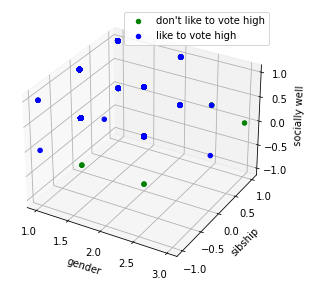

In [890]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(predictors[np.argwhere(y==0),0],predictors[np.argwhere(y==0),1],predictors[np.argwhere(y==0),2],c='green',alpha=1.0)
ax.scatter(predictors[np.argwhere(y==1),0],predictors[np.argwhere(y==1),1],predictors[np.argwhere(y==1),2],c='blue',alpha=1.0)
ax.set_xlabel('gender')
ax.set_ylabel('sibship')
ax.set_zlabel('socially well') 
plt.legend(['don\'t like to vote high','like to vote high'])
plt.tight_layout()
plt.show()

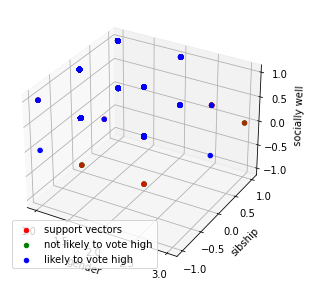

In [907]:
clf = svm.SVC(kernel='linear').fit(predictors,yor)
# Step 2: Visualize the support vectors (you can skip this once you know
# what you're doing). For now, let's add that to the scatter plot.
sV = clf.support_vectors_ # Retrieve the support vectors from the model
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(sV[:,0],sV[:,1],sV[:,2],c='red')
ax.scatter(predictors[np.argwhere(y==0),0],predictors[np.argwhere(y==0),1],predictors[np.argwhere(y==0),2],c='green',alpha=1.0)
ax.scatter(predictors[np.argwhere(y==1),0],predictors[np.argwhere(y==1),1],predictors[np.argwhere(y==1),2],c='blue',alpha=1.0)
ax.set_xlabel('gender')
ax.set_ylabel('sibship')
ax.set_zlabel('socially well') 
plt.legend(['support vectors','not likely to vote high','likely to vote high'])
plt.tight_layout()
plt.show()

In [908]:
predictions = clf.predict(predictors) # Decision reflects who the model thinks will be depressed

# Step 4: Assess model accuracy by comparing predictions with reality
modelAccuracy = roc_auc_score(yor,predictions)
print('SVM model accuracy:',modelAccuracy)

SVM model accuracy: 0.522770227076906


In [906]:
clf = RandomForestClassifier(n_estimators=100).fit(predictors,y) # 100 trees

# Use model to make predictions:
predictions = clf.predict(predictors) 

# Assess model accuracy:
modelAccuracy = roc_auc_score(yor,predictions)
print('Random forest model accuracy:',modelAccuracy)

Random forest model accuracy: 0.5367262847772312


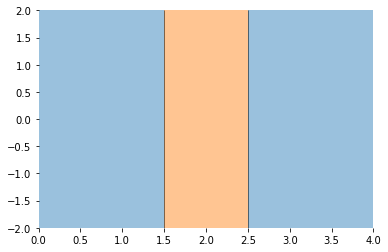

In [905]:
value=1.5
width=0.75
plot_decision_regions(predictors, y, clf,feature_index=[0,1],filler_feature_values={1: value, 2:value})
plt.show()

In [956]:
movie = np.transpose([roatatedData[:,0]*-1,roatatedData[:,1]*-1])

In [957]:
y = df.iloc[:,0:400].loc[df.iloc[:,464:474].dropna().index.values].apply(lambda x: np.nanmean(x), axis = 1)

In [958]:
model = LinearRegression().fit(movie,y)
b0, b1 = model.intercept_, model.coef_
yHat = b1[0]*movie[:,0] + b1[1]*movie[:,1]+ b0
r_sq = model.score(movie, y) # Note that this is the same as by hand!

Text(0.5, 1.0, 'R^2 = 0.006')

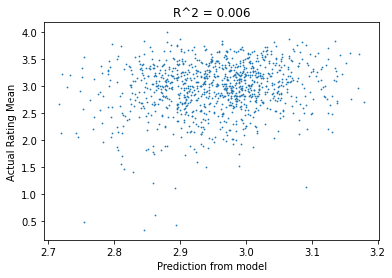

In [959]:
plt.plot(yHat,y,'o',markersize=.75) 
plt.xlabel('Prediction from model') 
plt.ylabel('Actual Rating Mean')  
plt.title('R^2 = {:.3f}'.format(rSqr))

In [974]:
x1 = np.copy(movie[0:500,:])
y1 = np.copy(y[0:500])
regr = LinearRegression().fit(x1,y1) 
betas1 = regr.coef_ 
yInt1 = regr.intercept_
r_sq = model.score(movie, y) # Note that this is the same as by hand!

Text(0.5, 1.0, 'R^2 = 0.006')

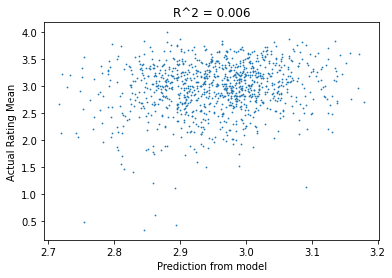

In [975]:
plt.plot(yHat,y,'o',markersize=.75) 
plt.xlabel('Prediction from model') 
plt.ylabel('Actual Rating Mean')  
plt.title('R^2 = {:.3f}'.format(rSqr))

In [976]:
yHat1 = betas1[0]*x1[:,0] + betas1[1]*x1[:,1] + yInt1
yHat2 = betas1[0]*x2[:,0] + betas1[1]*x2[:,1] + yInt1
rmse = np.sqrt(np.mean((y2 - yHat2)**2))
rmse

0.4885966278622591

In [979]:
df = pd.read_csv('movieReplicationSet - Copy.csv')

In [983]:
social = df.index[df['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'] == 1]
nonsocial = df.index[df['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'] == 0]
social_wall = df['Pulp Fiction (1994)'][social].dropna().values
nonsocial_wall = df['Pulp Fiction (1994)'][nonsocial].dropna().values

In [985]:
t, p = stats.ttest_ind(social_wall, nonsocial_wall)
p

0.02050746783240796

In [988]:
u, p = stats.mannwhitneyu(social_wall, nonsocial_wall)
p

0.007944177888307091

p-value:  0.01011


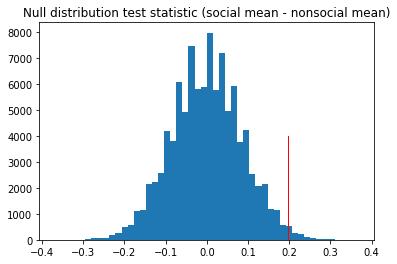

In [991]:
# permutation test
empiricalData1 = social_wall
empiricalData2 = nonsocial_wall
ourTestStat = np.mean(empiricalData1) - np.mean(empiricalData2)
numReps = int(100000) # This is how many times we'll draw WITHOUT replacement 
# to create the null distribution
jointData = np.concatenate((empiricalData1,empiricalData2)) # Stack them on 
# top of each other. For a joint representation.
n1 = len(empiricalData1) # How long one of them is
n2 = len(jointData) # Overall length
shuffledStats = np.empty([numReps,1]) # Initialize empty array
shuffledStats[:] = np.NaN # Then convert to NaN

# Joint Data has indices from 1 to 2xn1. 
# Step 1: Randomly shuffle those indices
# Step 2: Split them in the middle to create two artificial groups 
# Step 3: Repeat num reps times
# Step 4: Profit
for i in range(numReps):
    shuffledIndices = np.random.permutation(n2) # shuffle indices 0 to 2985
    shuffledGroup1 = jointData[shuffledIndices[:n1]]
    shuffledGroup2 = jointData[shuffledIndices[n1:]]
    shuffledStats[i,0] = np.mean(shuffledGroup1) - np.mean(shuffledGroup2)
plt.hist(shuffledStats,50)
plt.title('Null distribution test statistic (social mean - nonsocial mean)')
plt.plot([ourTestStat,ourTestStat],[0,4000],color='red',linewidth=1.0)

temp1 = np.argwhere(shuffledStats > ourTestStat)

# How often is the test stat larger than the empirical one by chance?:
temp2 = len(temp1)

# Compute the p-value:
exactPvalue = temp2/len(shuffledStats)
print('p-value: ', exactPvalue)

0.02803241784160282 0.36660646362602545


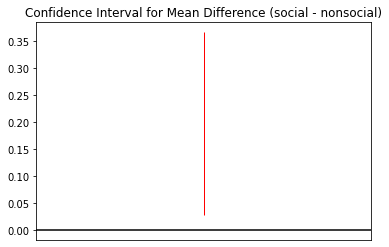

In [992]:
import numpy as np, statsmodels.stats.api as sms
X1, X2 = social_wall, nonsocial_wall
cm = sms.CompareMeans(sms.DescrStatsW(X1), sms.DescrStatsW(X2))
lower, higher = cm.tconfint_diff(usevar='unequal')
plt.axhline(y=0, color='black', label='avline')
plt.vlines(x = 0.5, ymin=lower, ymax=higher, linewidth=1, color='r')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.title('Confidence Interval for Mean Difference (social - nonsocial)')
print(lower, higher)

[3.27425] [3.3082]


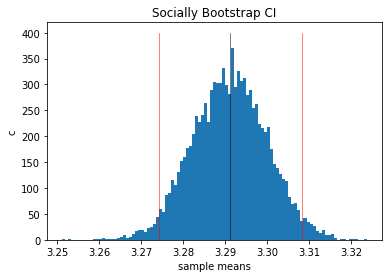

In [993]:
bootCI(social_wall,'Socially Bootstrap CI')

[3.0755] [3.1128]


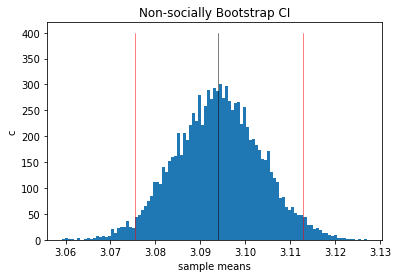

In [994]:
bootCI(nonsocial_wall,'Non-socially Bootstrap CI')